## Pandas tutorial follow along 
### Exercise Set 1

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = pd.DataFrame.from_csv(
    'titles.csv', index_col=None, encoding='utf-8')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### How many movies are listed in the titles dataframe?

In [100]:
len(titles)

230621

### What are the earliest two films listed in the titles dataframe?

In [101]:
titles.sort_values('year').head(2)

,title,year
176477,Miss Jerry,1894
213694,The Startled Lover,1898


### How many movies have the title "Hamlet"?


In [102]:
len(titles[titles.title == 'Hamlet'])

18

### How many movies are titled "North by Northwest"?

In [103]:
len(titles[titles.title == 'North by Northwest'])

1

### When was the first movie titled "Hamlet" made?

In [108]:
titles[titles.title == 'Hamlet'].head(1).year.values[0]

1948

### List all of the "Treasure Island" movies from earliest to most recent.

In [109]:
#I'm gonna practice creating the index here.
t = titles.set_index('title').sort_index()
t.head()

,year
title,
#1 Serial Killer,2013
#227,2020
#5,2013
#50Fathers,2015
#66,2015


In [112]:
t.loc['Treasure Island'].sort_values('year')

,year
title,
Treasure Island,1918
Treasure Island,1920
Treasure Island,1934
Treasure Island,1950
Treasure Island,1972
Treasure Island,1973
Treasure Island,1985
Treasure Island,1999


### How many movies were made in the year 1950?

In [114]:
t.year.value_counts()[1950]

1093

### How many movies were made in the year 1960?

In [115]:
t.year.value_counts()[1960]

1496

### How many movies were made from 1950 through 1959?

In [124]:
t.year.value_counts().sort_index().loc[1950:1960].sum()

14152

### In what years has a movie titled "Batman" been released?

In [127]:
t.loc['Batman'].year.values

array([1943, 1989])

### How many roles were there in the movie "Inception"?

In [133]:
#cast.head()
c = cast[cast.title == 'Inception']
len(c)

77

### How many roles in the movie "Inception" are NOT ranked by an "n" value?

In [136]:
c = cast[(cast.title == 'Inception') & (cast.n.isnull())]
len(c)

26

### But how many roles in the movie "Inception" did receive an "n" value?

In [137]:
c = cast[(cast.title == 'Inception') & (cast.n.notnull())]
len(c)

51

### Display the cast of "North by Northwest" in their correct "n"-value order, ignoring roles that did not earn a numeric "n" value.

In [139]:
c = cast[(cast.title == 'North by Northwest') & (cast.n.notnull())].sort_values('n')
c

,title,year,name,type,character,n
840374,North by Northwest,1959,Cary Grant,actor,Roger O. Thornhill,1.0
3361396,North by Northwest,1959,Eva Marie Saint,actress,Eve Kendall,2.0
1404704,North by Northwest,1959,James Mason,actor,Phillip Vandamm,3.0
3024085,North by Northwest,1959,Jessie Royce Landis,actress,Clara Thornhill,4.0
343701,North by Northwest,1959,Leo G. Carroll,actor,The Professor,5.0
2923056,North by Northwest,1959,Josephine Hutchinson,actress,Mrs. Townsend,6.0
1634552,North by Northwest,1959,Philip Ober,actor,Lester Townsend,7.0
1229083,North by Northwest,1959,Martin Landau,actor,Leonard,8.0
2357939,North by Northwest,1959,Adam Williams,actor,Valerian,9.0
1746383,North by Northwest,1959,Edward Platt,actor,Victor Larrabee,10.0


### Display the entire cast, in "n"-order, of the 1972 film "Sleuth".

In [141]:
c = cast[(cast.title == 'Sleuth') & (cast.year == 1972)].sort_values('n')
c

,title,year,name,type,character,n
1644328,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
314691,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
360365,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
1412647,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
2619278,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
1396572,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0


### Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".

In [143]:
c = cast[(cast.title == 'Sleuth') & (cast.year == 2007)].sort_values('n')
c

,title,year,name,type,character,n
314692,Sleuth,2007,Michael Caine,actor,Andrew,1.0
1246855,Sleuth,2007,Jude Law,actor,Milo,2.0
1741124,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
250297,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
360366,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
2619277,Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
3223502,Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN


### How many roles were credited in the silent 1921 version of Hamlet?


In [145]:
c = cast[(cast.title == 'Hamlet') & (cast.year == 1921)]
len(c)

9

### How many roles were credited in Branagh’s 1996 Hamlet?

In [147]:
len(cast[(cast.title == 'Hamlet') & (cast.year == 1996)])

54

### How many "Hamlet" roles have been listed in all film credits through history?

In [149]:
h = cast[cast.character == 'Hamlet']
len(h)

91

### How many people have played an "Ophelia"?

In [150]:
o = cast[cast.character == 'Ophelia']
len(o)

111

### How many people have played a role called "The Dude"?

In [151]:
td = cast[cast.character == 'The Dude']
len(td)

18

### How many people have played a role called "The Stranger"?

In [152]:
ts = cast[cast.character == 'The Stranger']
len(ts)

208

### How many roles has Sidney Poitier played throughout his career?

In [154]:
sp = cast[cast.name == 'Sidney Poitier']
len(sp)

43

### How many roles has Judi Dench played?

In [155]:
jd = cast[cast.name == 'Judi Dench']
len(jd)

55

### List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.

In [156]:
cg = cast[(cast.name == 'Cary Grant') & (cast.year // 10 * 10 == 1940) & (cast.n == 2)]
cg

,title,year,name,type,character,n
840371,My Favorite Wife,1940,Cary Grant,actor,Nick,2.0
840381,Penny Serenade,1941,Cary Grant,actor,Roger Adams,2.0


### List the leading roles that Cary Grant played in the 1940s in order by year.

In [157]:
cg = cast[(cast.name == 'Cary Grant') & (cast.year // 10 * 10 == 1940) & (cast.n == 1)].sort_values('year')
cg

,title,year,name,type,character,n
840397,The Howards of Virginia,1940,Cary Grant,actor,Matt Howard,1.0
840353,His Girl Friday,1940,Cary Grant,actor,Walter Burns,1.0
840399,The Philadelphia Story,1940,Cary Grant,actor,C. K. Dexter Haven,1.0
840386,Suspicion,1941,Cary Grant,actor,Johnnie,1.0
840401,The Talk of the Town,1942,Cary Grant,actor,Leopold Dilg,1.0
840377,Once Upon a Honeymoon,1942,Cary Grant,actor,Patrick 'Pat' O'Toole,1.0
840344,Destination Tokyo,1943,Cary Grant,actor,Capt. Cassidy,1.0
840369,Mr. Lucky,1943,Cary Grant,actor,Joe Adams,1.0
840370,Mr. Lucky,1943,Cary Grant,actor,Joe Bascopolous,1.0
840378,Once Upon a Time,1944,Cary Grant,actor,Jerry Flynn,1.0


### How many roles were available for actors in the 1950s?

In [160]:
r50 = cast[(cast.year // 10 * 10 == 1950) & (cast.type == 'actor')]
len(r50)

154727

### How many roles were available for actresses in the 1950s?


In [161]:
r50 = cast[(cast.year // 10 * 10 == 1950) & (cast.type == 'actress')]
len(r50)

56259

### How many leading roles (n=1) were available from the beginning of film history through 1980?

In [164]:
n1 = cast[(cast.n == 1) & (cast.year >= 1980)].sort_values('year')
len(n1)

84264

### How many non-leading roles were available through from the beginning of film history through 1980?

In [165]:
n1 = cast[(cast.n != 1) & (cast.year >= 1980)].sort_values('year')
len(n1)

2391035

In [5]:
len(titles)

230621

### How many roles through 1980 were minor enough that they did not warrant a numeric "n" rank?

In [166]:
na = cast[(cast.n.isnull()) & (cast.year >= 1980)]
len(na)

945383

In [10]:
h = titles.head(10)
h['year'] // 10 * 10

0    1990
1    1960
2    1990
3    2000
4    2010
5    2010
6    2000
7    1970
8    2010
9    2000
Name: year, dtype: int64

In [11]:
h.year

0    1990
1    1969
2    1993
3    2000
4    2011
5    2015
6    2008
7    1970
8    2016
9    2008
Name: year, dtype: int64

In [12]:
h.year > 1985

0     True
1    False
2     True
3     True
4     True
5     True
6     True
7    False
8     True
9     True
Name: year, dtype: bool

In [13]:
h[h.year > 1985]

,title,year
0,The Rising Son,1990
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011
5,Medusa (IV),2015
6,The Fresh Air Will Do You Good,2008
8,L'outsider,2016
9,Do Outro Lado do Mundo,2008


In [18]:
h[(h.year > 1980) | (h.year >=1990)]

,title,year
0,The Rising Son,1990
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011
5,Medusa (IV),2015
6,The Fresh Air Will Do You Good,2008
8,L'outsider,2016
9,Do Outro Lado do Mundo,2008


In [24]:
t = titles
t[t.title == 'Macbeth'].sort_values('year')

,title,year
4162,Macbeth,1913
67313,Macbeth,1916
157917,Macbeth,1948
203220,Macbeth,1987
16930,Macbeth,1997
25430,Macbeth,1998
86470,Macbeth,2003
131922,Macbeth,2004
55416,Macbeth,2006
150447,Macbeth,2009


In [29]:
c = cast.head(10)
c[c.n.notnull()]

,title,year,name,type,character,n
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0


In [34]:
c = titles.head(10)
c[c.title.str.startswith('The')]

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
6,The Fresh Air Will Do You Good,2008


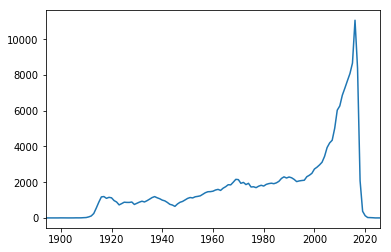

In [38]:
titles.year.value_counts().sort_index().plot()

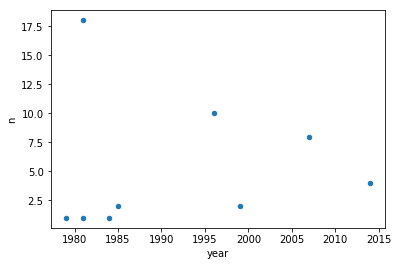

In [39]:
c = cast[cast.character == 'Kermit the Frog']
c.plot(x='year',y='n',kind='scatter')

In [41]:
c.head()[['year','n']]

,year,n
947844,1981,18.0
947845,1985,2.0
947850,1981,1.0
947858,1979,1.0
947865,1984,1.0


In [44]:
len(cast)

3611212

In [47]:
%%time
cast[cast.title == 'Sleuth']

CPU times: user 620 ms, sys: 15.4 ms, total: 635 ms
Wall time: 784 ms


,title,year,name,type,character,n
250297,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
314691,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
314692,Sleuth,2007,Michael Caine,actor,Andrew,1.0
360365,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
360366,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1246855,Sleuth,2007,Jude Law,actor,Milo,2.0
1396572,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1412647,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1644328,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1741124,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [58]:
c = cast.set_index(['title','year']).sort_index()
c.head()

name   type               character     n
title            year                                                        
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17.0
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21.0
                 2013  Zachary (X) Brown  actor  Africian American Teen  18.0
                 2013     Yvis Cannavale  actor            Homeless Man  25.0
                 2013      Patrick Chien  actor          Cleaver Victim  22.0

In [67]:
%%time
#c.loc['Star Wars'].loc[1977]
c.loc[('Sleuth',1972)]

CPU times: user 1.72 ms, sys: 120 µs, total: 1.84 ms
Wall time: 2.59 ms


name     type                   character    n
title  year                                                              
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2.0
       1972      Alec Cawthorne    actor           Inspector Doppler  3.0
       1972        Teddy Martin    actor      Police Constable Higgs  6.0
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4.0
       1972    Laurence Olivier    actor                 Andrew Wyke  1.0
       1972  Eve (III) Channing  actress             Marguerite Wyke  5.0

In [65]:
c.loc[('Sleuth',1972)].reset_index(['title','year'])

,title,year,name,type,character,n
0,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
1,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
2,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
3,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
4,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
5,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0


In [71]:
#Group by
c = cast
c = c[c.name == 'George Clooney']
#c.groupby(['title','year','character']).size()
c.groupby(c.year // 10 * 10).n.size()

year
1980     2
1990    14
2000    20
2010    11
Name: n, dtype: int64

In [72]:
c = cast
c.groupby([c.year // 10 * 10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27099
      actress     15484
1920  actor       47783
      actress     23526
1930  actor      149800
      actress     49060
1940  actor      160460
      actress     50911
1950  actor      154727
      actress     56259
1960  actor      130593
      actress     55862
1970  actor      149433
      actress     64843
1980  actor      193482
      actress     89223
1990  actor      258799
      actress    122359
2000  actor      484890
      actress    260766
2010  actor      682777
      actress    382812
2020  actor         129
      actress        62
dtype: int64

In [81]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
g = c.groupby(['character',c.year // 10 * 10]).size()
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [91]:
#g.unstack(0)
u = g.unstack(0).fillna(0)
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,0.0
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,0.0


In [92]:
u['Kermit the Frog'] - u['Oscar the Grouch']


year
1970    1.0
1980    2.0
1990    1.0
2000    0.0
2010    1.0
dtype: float64

In [99]:
df = g.unstack('character')
df['extra'] = 1
df = df.set_index('extra', drop=True, append=True)
df.unstack('year').fillna(0)

character Kermit the Frog                     Oscar the Grouch                 \
year                 1970 1980 1990 2000 2010             1970 1980 1990 2000   
extra                                                                           
1                     1.0  4.0  2.0  1.0  1.0              0.0  2.0  1.0  1.0   

character       
year      2010  
extra           
1          0.0